TODO
* PRESENTATION
* EXERCISES
* FINISH THE ARGMAX AND REVIEW
* MAKE ANOTHER REVIEW

https://pt.slideshare.net/maggiev/the-interpretation-of-quartiles-and-percentiles-july-2009

# LU5 - Basic Statistics: Learning notebooks

In this notebook we will cover the following:
 - Mode
 - Mean
 - Median
 - Variance
 - Standard Deviation
 - Quantiles
 - Uniques
 - Frequency tables
 - Summarize
 - Argmax


Some imports to help us 

In [39]:
from pydataset import data # this is just to get some datasets
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

### Some context

Let's have a look at the some legos to understand how some of this concepts can help us

In [131]:
lego = pd.read_csv('data/sets.csv')

In [11]:
lego.shape # we are dealing with something that starts to be big

(11673, 5)

Here's some metadata about the dataset

![meta](metadata.png)

In [22]:
lego.head()  # let's have a look at the first lines of the dataframe

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


> Here we can start using some basic statistics to help us understand our dataset. We will go one by one and try to have an intuition for when it's best to use each one 

## Mode

> We can start by asking: What is the year that had more sets published?

For this we can use the `mode`. The mode is just the most frequent number in a set. 

In [26]:
lego.year.mode()     # seems like 2014 was the year where more sets were published

0    2014
dtype: int64

In pandas, the documentation for the `mode` is: Gets the mode(s) of each element along the axis selected. Adds a row for each mode per label, fills in gaps with nan. This means we can do this for non-numerical data as well. 

In [29]:
lego.name.mode()     #  this returns the most frequent name in the column name

0    Basic Building Set
dtype: object

# Mean and Median

As a kid I remember the more number of parts the better. What is the average number of parts in the sets of legos now?

To answer this question we can check the mean and median and try to understand that difference between them. 

> #### Mean: sum all the values and divide by the number of values that exists. 

![mean](https://classconnection.s3.amazonaws.com/258/flashcards/4553258/png/sample_mean_formula-1430DFD699B7A70F795-thumb400.png)


In [30]:
lego.num_parts.mean()    # In terms of code, it's as simple as this. We have an avearge of 162 numbers of parts

162.26240041120533

> #### Median: This is a bit more tricky the way to do it depends on the number of observations being odd or even

![median](https://www.onlinemathlearning.com/image-files/xmedian.png.pagespeed.ic.IbKdiN29Yk.png)

In [32]:
lego.num_parts.median()  # Wow the median is quite different! 45 parts only.. we have some big sets in there

45.0

So when should we use each one of them? 

# insert image of difference
--------------------------------------------------

Ok so we have some indication that we should look a bit more for this.. Mean and Median being so different is an indication of either outliers of skewed distributions. So far we have been looking at centrality measures. Now let's look at dispersion, to understand how "spread" our data is

## Standard Deviation and Variance

The standard deviation is a numerical value used to indicate how widely individuals in a group vary. If individual observations vary greatly from the group mean, the standard deviation is big; and vice versa.

It is important to distinguish between the standard deviation of a population and the standard deviation of a sample. They have different notation, and they are computed differently. The standard deviation of a population is denoted by `σ` and the standard deviation of a sample, by `s`.

The standard deviation is equal to the square root of the variance.

As you can see below, the variance it's not so intuitive. This is because it's expressed in different units that the mean and it becomes harder for us to understand the dispersion

In [45]:
lego.num_parts.var()

109026.82824430607

The standard deviation on the other hand it's more intuitive as we can compare it to the mean

In [34]:
lego.num_parts.std()

330.19210808907303

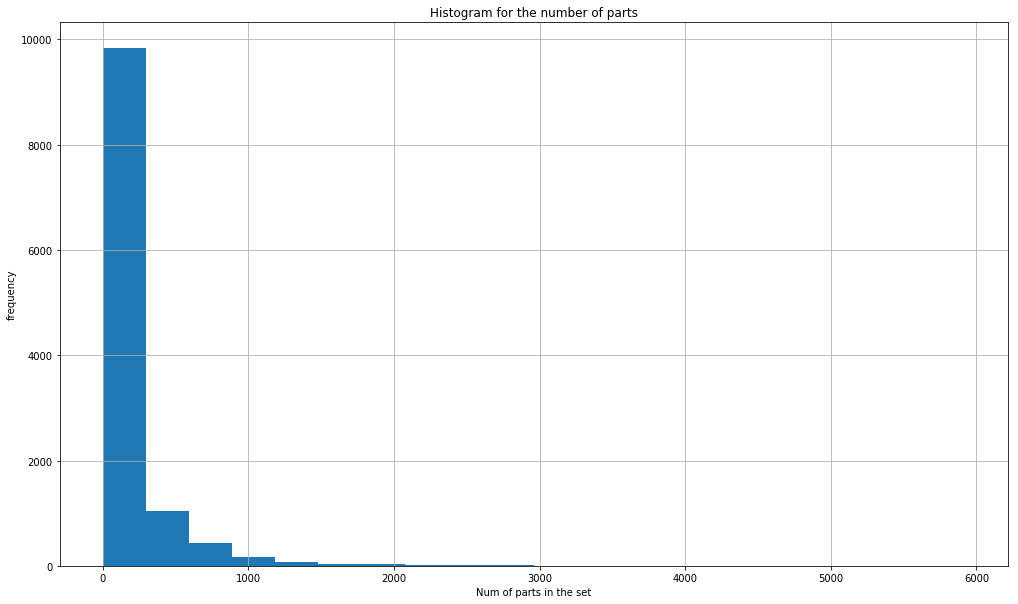

In [130]:
lego.num_parts.hist(bins=20, figsize=(17,10))
plt.xlabel('Num of parts in the set')
plt.title('Histogram for the number of parts')
plt.ylabel('frequency')
plt.show();

Ok we can see that there seem to be some big outliers!

## Quantiles

A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit. Special quantiles are the quartile (quarter), the quintile (fifth) and percentiles (hundredth).

Quartiles divide a rank-ordered data set into four equal parts. The values that divide each part are called the first, second, and third quartiles; and they are denoted by Q1, Q2, and Q3, respectively.

Note the relationship between quartiles and percentiles. Q1 corresponds to P25, Q2 corresponds to P50, Q3 corresponds to P75. Q2 is the median value in a set of data.

![quantiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

In [48]:
quartiles = [.25, .5, .75]
lego.num_parts.quantile(q=quantiles)

0.25     10.0
0.50     45.0
0.75    172.0
Name: num_parts, dtype: float64

We know that 75% of our sets have less than 172 num of parts. Here we can see why it's simple and useful to use quartiles vs mean. Remember the `mean = 162`. One can also look at the Interquartile Range, that basically show us the range where the "middle fifty" is.

## Summarizing

As usual, pandas has something extremely helpeful. It's the `describe` method. It gives you a summary of what you variable looks like. It's an easy to have a look and to spot some things you might explore later on.

In [63]:
lego.num_parts.describe()

count    11673.000000
mean       162.262400
std        330.192108
min         -1.000000
25%         10.000000
50%         45.000000
75%        172.000000
max       5922.000000
Name: num_parts, dtype: float64

So we have a number of parts with `-1` 

### Because we have too many parts and year, let's aggregate into two new columns: Column `before_millenium` that indicates if the set was produced before 2000 or after. Another column is `size_set`. This will show us if a set is big, if the number of parts is `> 100 ` or small otherwise. 

### [ ! ] Move this to utils

In [85]:
_lego = lego.copy()
_lego['before_millenium'] = np.where(lego['year'] < 2000, 1, 0)
_lego['size_set'] = np.where(lego['num_parts'] > 100, 'big set', 'small set')

In [86]:
_lego.head()

,set_num,name,year,theme_id,num_parts,before_millenium,size_set
0,00-1,Weetabix Castle,1970,414,471,1,big set
1,0011-2,Town Mini-Figures,1978,84,12,1,small set
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,1,small set
3,0012-1,Space Mini-Figures,1979,143,12,1,small set
4,0013-1,Space Mini-Figures,1979,143,12,1,small set


We want to see how the sizes changed before and after the millenium. To do this, we have something that is called a frequency table. 

Frequency tables are the frequency counts of categorical variables. 

Pandas provides us with `pd.crosstab` which is a simple way to create different levels of frequency tables. Let's see what this means:

In [87]:
pd.crosstab(index=_lego['size_set'], columns=_lego['before_millenium'])

before_millenium,0,1
size_set,,
big set,2753,1145
small set,5256,2519


Now we have a table that show us the counts of the sets before and after the millenium and their respective size. We can include an argument that is `margins=True` to have the sum of rows and columns. This can be extremely useful when we start taking some conclusion from this data.

In [89]:
pd.crosstab(index=_lego['size_set'], columns=_lego['before_millenium'], margins=True)

before_millenium,0,1,All
size_set,,,
big set,2753,1145,3898
small set,5256,2519,7775
All,8009,3664,11673


## Unique

But wait... before and after the millenium? How many year are in this data set exactly? One interesting thing is the `unique()` method. It gives us the unique values in a Series. 

Let's see the what are the years that we have in our dataset: 

In [91]:
_lego.year.unique()

array([1970, 1978, 1987, 1979, 1976, 1965, 1985, 1968, 1999, 1967, 1969,
       2001, 1966, 2003, 2002, 2004, 2006, 2005, 2010, 2007, 2008, 2009,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 1977, 1983, 1986, 1984,
       1973, 1981, 2000, 1980, 1982, 1988, 1997, 1998, 1971, 1955, 1956,
       1957, 1958, 1974, 1972, 1975, 1992, 1991, 1989, 1990, 1993, 1994,
       1996, 1995, 1959, 1962, 1961, 1960, 1963, 1964, 1950, 1953, 1954])

Just as an example, as we know which are the uniques becase we created them, we can see the uniques in the size dataset

In [92]:
_lego.size_set.unique()

array(['big set', 'small set'], dtype=object)

What is the position of the maximum values? We have `argmax()` to tell us the first index of the maximum value of an array. This can be useful if you want to do something with the maximum value and you need to automatically understand where it is. 

**[stop here]**

In [109]:
lego.year.argmax()

/Users/ricardo/.virtualenvs/academy_learning_unit/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


236

In [110]:
lego.num_parts.argmax()

/Users/ricardo/.virtualenvs/academy_learning_unit/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


170

In [114]:
lego.num_parts.max()

5922

In [120]:
lego.loc[170]

set_num        10189-1
name         Taj Mahal
year              2008
theme_id           276
num_parts         5922
Name: 170, dtype: object

In [ ]:
iris = data('iris')

In [13]:
iris.mode(axis = 0)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


In [28]:
iris['Petal.Length'].value_counts()

1.5    13
1.4    13
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: Petal.Length, dtype: int64

> Depending on what you want to do, you might as well be using `Series.mode()`

In [19]:
iris['Petal.Length'].mode()

0    1.4
1    1.5
dtype: float64

## Mean

> One can see the mean for all columns in the dataframe by `DataFrame.mean()`

In [36]:
iris.mean()

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

> One can see the average value for a particular column `DataFrame.column.mean()`

In [33]:
iris['Petal.Length'].mean()

3.7580000000000005

## Median

In [37]:
iris.median()

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [38]:
iris['Petal.Length'].median()

4.35

> Even size population

In [54]:
pd.Series([1, 3, 5, 7, 9, 11]).median()

6.0

> Odd size population

In [55]:
pd.Series([1, 3, 5, 7, 9, 11, 13]).median()

7.0

## Variance

![Variance](http://www.statisticshowto.com/wp-content/uploads/2009/08/usual.png)

In [39]:
iris['Petal.Length'].var()

3.116277852348993

## Standard Deviation

![standard_deviation](https://usercontent2.hubstatic.com/6951521_f520.jpg)

In [40]:
iris['Petal.Length'].std()

1.7652982332594662

> The reason standard deviation is most of the times more useful for a basic stat is that shows you the dispersion in the same units as the mean

## Quantiles

> Wikipedia definition

> q-Quantiles are values that partition a finite set of values into q subsets of (nearly) equal sizes. There are q − 1 of the q-quantiles, one for each integer k satisfying 0 < k < q. In some cases the value of a quantile may not be uniquely determined, as can be the case for the median (2-quantile) of a uniform probability distribution on a set of even size. Quantiles can also be applied to continuous distributions, providing a way to generalize rank statistics to continuous variables. When the cumulative distribution function of a random variable is known, the q-quantiles are the application of the quantile function (the inverse function of the cumulative distribution function) to the values {1/q, 2/q, …, (q − 1)/q}.
     


![quantiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

In [46]:
quantiles = [.25, .5, .75]
iris['Petal.Length'].quantile(q=quantiles)

NameError: name 'iris' is not defined

In [45]:
iris['Petal.Length'].median()

4.35

#### Check with Pedro if it's ok to have `max()` here

In [46]:
iris['Petal.Length'].max()   # .max() returns the max value of a Series

6.9

## Uniques

> We can see the unique values in a Series. This is extremely useful to help on exploratory data analysis

In [59]:
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Frequency tables

> A frequency table is just a data table that shows the counts of one or more categorical variables.

> Plants are getting boring. Let's switch to a modified version of the famous Titanic dataset

In [60]:
titanic = data('titanic')

In [187]:
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


> ### One way tables

In [77]:
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [190]:
pd.crosstab(index=titanic["survived"], columns="count")

col_0,count
survived,
no,817
yes,499


In [189]:
pd.crosstab(index=titanic["age"], columns="count")

col_0,count
age,
adults,1207
child,109


In [188]:
pd.crosstab(index=titanic["class"], columns="count")

col_0,count
class,
1st class,325
2nd class,285
3rd class,706


> ### Two way tables

In [85]:
pd.crosstab(index=titanic['sex'], columns=titanic['class']) # gender for class

class,1st class,2nd class,3rd class
sex,,,
man,180,179,510
women,145,106,196


In [ ]:
pd.crosstab(index=titanic['sex'], columns=titanic['class'])

> Cool stuff you can add: `margins` argument

In [86]:
pd.crosstab(index=titanic['sex'], columns=titanic['class'], margins=True) # gender for class

class,1st class,2nd class,3rd class,All
sex,,,,
man,180,179,510,869
women,145,106,196,447
All,325,285,706,1316


> ### More dimensions

In [94]:
pd.crosstab(index=titanic['age'], columns=[titanic['class'], titanic['sex']])

class  1st class       2nd class       3rd class      
sex          man women       man women       man women
age                                                   
adults       175   144       168    93       462   165
child          5     1        11    13        48    31

## Summarize

> Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

#### Titanic dataset: where all variables are categorical

In [191]:
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


In [96]:
titanic.describe()

,class,age,sex,survived
count,1316,1316,1316,1316
unique,3,2,2,2
top,3rd class,adults,man,no
freq,706,1207,869,817


#### Iris dataset: both categorical and numeric 

In [192]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [97]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Position of the maximum value, known as argmax

In [115]:
iris_num = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]

> Notice that these ARE NOT the maximum values! This is the value of the index where the max value is in the dataframe, for each specific column. In this case, if we check the row where `index = 132`, we will have the max 
value of Sepal Length

In [120]:
iris_num.idxmax()

Sepal.Length    132
Sepal.Width      16
Petal.Length    119
Petal.Width     101
dtype: int64

In [123]:
iris_num.max()

Sepal.Length    7.9
Sepal.Width     4.4
Petal.Length    6.9
Petal.Width     2.5
dtype: float64

> This has to be `loc` and not `iloc`. The reason is the index that idxmax consider is the dataframe index, which starts at 1. ** Be careful with that **

In [128]:
iris_num.loc[16]

Sepal.Length    5.7
Sepal.Width     4.4
Petal.Length    1.5
Petal.Width     0.4
Name: 16, dtype: float64

> # Stuff for the presentation! TO REMOVE LATER ON

In [167]:
ages = pd.DataFrame({'age':[37, 20, 35, 23, 33, 56, 34, 35, 6, 4, 19, 29, 20, 99]})

In [169]:
ages

,age
0,37
1,20
2,35
3,23
4,33
5,56
6,34
7,35
8,6
9,4


In [173]:
ages_4 = pd.DataFrame({'age':[37, 20, 20, 99]})

In [177]:
ages_4.quantile(q=.75)

age    52.5
Name: 0.75, dtype: float64

In [184]:
gender = pd.DataFrame({'gender':['male', 'male', 'female', 'male',
                                 'male', 'male', 'male', 
                                 'male', 'male', 'female', 'male',
                                 'male', 'male', 'female', 'male',
                                 'male', 'male', 'female', 'male',
                                 'male', 'male', 'female', 'male',
                                 'male', 'male', 'female', 'male',
                                 'the academy is really cool','other', 'prefer not to say']})

In [185]:
gender

,gender
0,male
1,male
2,female
3,male
4,male
5,male
6,male
7,male
8,male
9,female


In [186]:
gender.gender.unique()

array(['male', 'female', 'the academy is really cool', 'other',
       'prefer not to say'], dtype=object)